# ME460 Linkages - Prof. Mark Ganter
# 3 position function generator via dyad-standard  equations 
# (r1+r5=r3 alt. form)

posl2= d1*(-0.357 + 0.766*I)*exp(I*t1) + d5*(-0.00745 + 0.122*I)*exp(I*t5) + 0.173 - 0.35*I
posl3= d1*(-0.741 + 0.966*I)*exp(I*t1) + d5*(-0.0729 + 0.375*I)*exp(I*t5) + 0.466 - 0.607*I

left 3pos solution r1,t1,r5,t5 = 0.320012373860617 -0.7634134692332548 0.984789337215888 27.29840908298694
abs(posl2)= 3.21e-5
abs(posl3)= 4.56e-5

phi2 = 50.0 phi3 = 75.0
psi2 = 22.5 psi3 = 45.0
gamma2 = 7.0 gamma3 = 22.0
del2 = -0.173 + 0.35*I
del3 = -0.466 + 0.607*I

R1 = ( 0.32 - 0.00426*I )  ( 0.320 @ -0.7634512246673453 degs)
R3 = ( 0.966 + 0.259*I )  ( 1.00 @ 14.995379794439515 degs)
R5 = ( 0.875 + 0.452*I )  ( 0.985 @ 27.2980258104932 degs)
R6 = ( 0.229 + 0.189*I )  ( 0.297 @ 39.46078955234503 degs)

Oa = ( 0 + I*0 )
A = ( 0.32 - 0.00426*I )
B = ( 1.2 + 0.447*I )
Ob = ( 0.229 + 0.189*I )


<IPython.core.display.Javascript object>


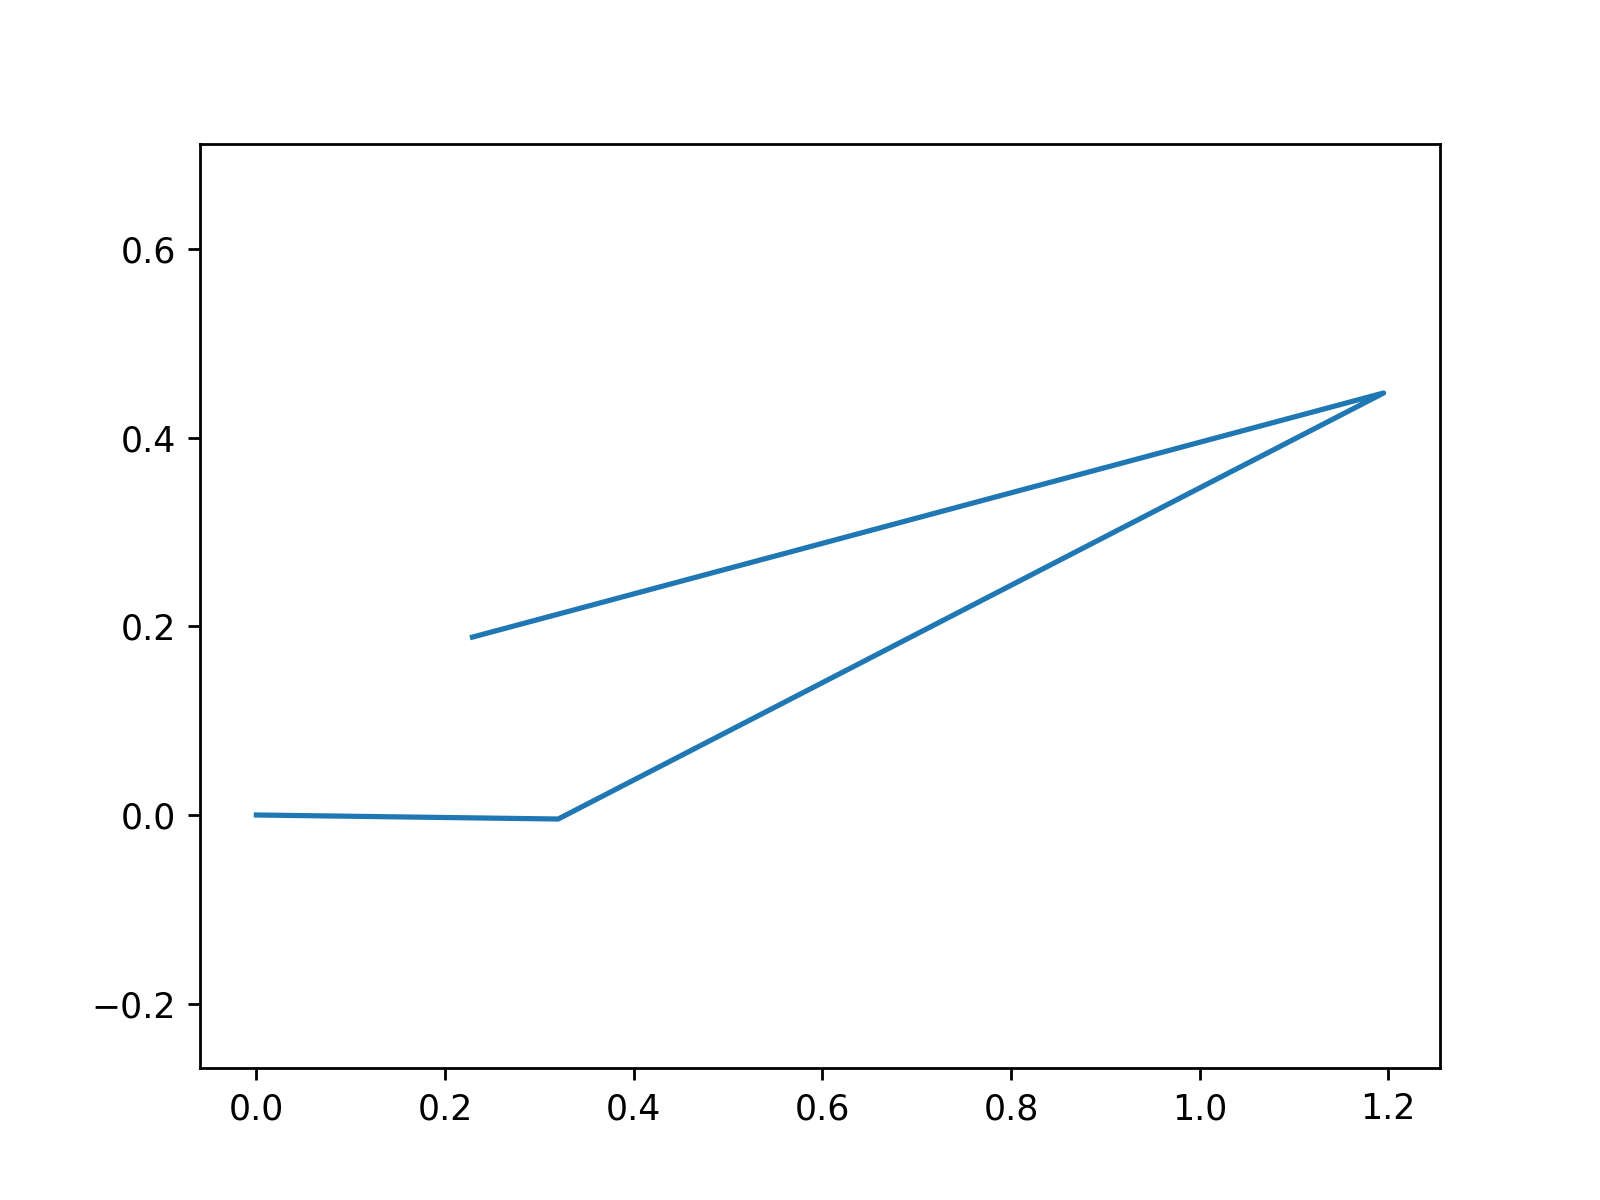

In [7]:
%matplotlib notebook
# this command tells notebook to display plots in the notebook
from math import *
from sympy import *

import matplotlib
import matplotlib.pyplot as plt

d1,t1 = symbols("d1 t1", real=True)
d5,t5= symbols("d5 t5", real=True)
g2,g3 = symbols("g2 g3", real=True)

r1 = d1*exp(I*t1)
r5 = d5*exp(I*t5)

# inputs phi's and psi's
p2 = radians(50)
p3 = radians(75)

s2 = radians(22.5)
s3 = radians(45)

# free choices gamma's 
g2 = radians(7)
g3 = radians(22)

# for r3 you only need to choose the angle as the length is always 1.0 (remember func. generators scale, trans & rotate)
r3 = 1.0*exp(I*radians(15.0))

#compute deltas
del2 = r3*(exp(I*s2)-1)
del3 = r3*(exp(I*s3)-1)


# LEFT SIDE #  (note: there is only a left side in the alt. formulation)

#write out the dyad-standard equations for left side of linkage 
posl2 = r1*(exp(I*p2)-1) + r5*(exp(I*g2)-1) - del2
posl3 = r1*(exp(I*p3)-1) + r5*(exp(I*g3)-1) - del3


print("posl2=",N(posl2,3))
print("posl3=",N(posl3,3))
print()

ansl = nsolve((re(posl2),im(posl2),re(posl3),im(posl3)), (d1, t1, d5, t5), (1,radians(-80),5 ,radians(60)), 
            maxsteps=200, tol=1.0e-3, verify=false)

print("left 3pos solution r1,t1,r5,t5 =",ansl[0],degrees(ansl[1]),ansl[2],degrees(ansl[3]))
print ("abs(posl2)=",N(abs(posl2.evalf(subs={d1:ansl[0],t1:ansl[1],d5:ansl[2],t5:ansl[3]}) ),3))
print ("abs(posl3)=",N(abs(posl3.evalf(subs={d1:ansl[0],t1:ansl[1],d5:ansl[2],t5:ansl[3]}) ),3))
print()


# RIGHT SIDE #
# there is only one side -- the left for function generators


evalr1 = N(r1.evalf(subs={d1:ansl[0],t1:ansl[1]}),3)
evalr3 = N(r3,3)
evalr5 = N(r5.evalf(subs={d5:ansl[2],t5:ansl[3]}),3)
evalr6 = evalr1+evalr5-evalr3

print("phi2 =",degrees(p2),"phi3 =",degrees(p3))
print("psi2 =",degrees(s2),"psi3 =",degrees(s3))
print("gamma2 =",degrees(g2),"gamma3 =",degrees(g3))
print("del2 =",N(del2.evalf(),3))
print("del3 =",N(del3.evalf(),3))
print()

print("R1 = (",evalr1,")  (", abs(evalr1),"@",degrees(arg(evalr1)),"degs)")
print("R3 = (",evalr3,")  (", abs(evalr3),"@",degrees(arg(evalr3)),"degs)")
print("R5 = (",evalr5,")  (", abs(evalr5),"@",degrees(arg(evalr5)),"degs)")
print("R6 = (",evalr6,")  (", abs(evalr6),"@",degrees(arg(evalr6)),"degs)")
print()

evalOa = 0
evalA = evalr1
evalB = evalr1+evalr5
evalOb = evalr1+evalr5-evalr3
print("Oa = ( 0 + I*0 )")
print("A = (",evalA,")")
print("B = (",evalB,")")
print("Ob = (",evalOb,")")

# call matplotlib routines for a scatter plot  
fig, ax = plt.subplots()
ax.plot([0,re(evalA),re(evalB),re(evalOb)], 
        [0,im(evalA),im(evalB),im(evalOb)])
ax.set_aspect('equal',adjustable='datalim')
plt.show()

